<a href="https://colab.research.google.com/github/Sid-Oya/DS-Builds/blob/master/Sidoney_Daley_Unit2_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url = 'https://www.ctdatacollaborative.org/sites/default/files/The%20Global%20Dataset%2014%20Apr%202020.csv'
trafficking = pd.read_csv(url)
trafficking.head()

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import sklearn
import statsmodels

%matplotlib inline
!pip install --upgrade category_encoders

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline


import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier


!pip install category_encoders==2.*  
!pip install pdpbox
!pip install shap
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp

from xgboost import XGBClassifier


import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [ ]:
trafficking['citizenship'].value_counts()

PH     11365
00      8858
UA      7761
MD      5901
US      3636
KH      1979
ID      1971
BY      1463
MM      1250
RO       655
GH       544
KG       437
BG       342
HT       339
-99      278
UZ       261
VN       170
GW       145
LA       126
CO       124
NG       108
UG        98
AF        97
MG        94
LK        85
SL        81
SN        70
TH        55
KZ        54
CD        53
ML        45
TJ        43
BF        33
KE        32
NE        31
CI        31
NP        27
TM        26
CN        23
AL        22
MX        19
BO        18
GN        15
ER        13
KR        12
BD        11
Name: citizenship, dtype: int64

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['PH', 'UA','MD', 'US', 'KH', 'ID','BY', 'MM', 'RO', 'GH' ],
                                                                ['Philippines', 'Ukraine','Moldova','USA', 'Cambodia', 'Indonesia', 'Belarus', 'Myanmar','Romania', 'Ghana' ])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['KG', 'BG', 'HT', 'UZ', 'VN', 'GW', 'LA', 'CO', 'NG', 'UG'], 
                                                                ['Kyrgyzstan', 'Bulgaria', 'Haiti', 'Uzbekistan', 'Viet Nam', 'Guinea-Bissau', 'Lao People Democratic Republic', 'Colombia', 'Nigeria', 'Uganda' ])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['AF','MG', 'LK', 'SL', 'SN', 'TH', 'KZ','CD', 'ML', 'TJ'],
                                                                ['Afghanistan', 'Madagascar', 'Sri Lanka', 'Sierra Leone', 'Senegal', 'Thailand', 'Kazakhstan', 'Democratic Republic of the Congo', 'Mali', 'Tajikistan'])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['BF', 'KE', 'NE', 'CI', 'NP', 'TM', 'CN', 'AL', 'MX', 'BO'],
                                                                ['Burkina Faso', 'Kenya', 'Niger', 'Côte dIvoire', 'Nepal', 'Turkmenistan', 'China', 'Albania', 'Mexico', 'Bolivia'])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['GN', 'ER', 'KR', 'BD'],
                                                                ['Guinea', 'Eritrea', 'Korea', 'Bangladesh'])

In [ ]:
trafficking['citizenship'].value_counts()

Philippines                         11365
00                                   8858
Ukraine                              7761
Moldova                              5901
USA                                  3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
-99                                   278
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People Democratic Republic        126
Colombia                              124
Nigeria                               108
Uganda                                 98
Afghanistan                            97
Madagascar                        

In [ ]:
trafficking['CountryOfExploitation'].value_counts()

US     12512
-99    10175
UA      5399
MD      4504
RU      2738
PH      1988
ID      1777
KH      1000
MY       930
00       844
GH       544
AE       504
BY       400
TH       391
SN       370
BG       356
HT       339
PL       326
SA       278
RO       259
RS       248
QA       239
KZ       222
KW       209
TR       197
MK       194
UZ       193
UG       151
BA       127
JP       111
JO       108
MG        94
OM        94
TT        85
AF        83
SL        81
CN        79
LB        73
TJ        54
IN        46
SY        41
CZ        38
SG        37
ZA        36
TW        33
HK        31
BD        26
TM        26
AT        24
IT        24
BH        22
AL        22
MU        20
AR        18
DK        17
VN        16
EG        13
EC        13
CY        11
LY        11
Name: CountryOfExploitation, dtype: int64

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['PH', 'UA','MD', 'US', 'KH', 'ID','BY', 'MM', 'RO', 'GH' ],
                                                                ['Philippines', 'Ukraine','Moldova','USA', 'Cambodia', 'Indonesia', 'Belarus', 'Myanmar','Romania', 'Ghana' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['KG', 'BG', 'HT', 'UZ', 'VN', 'GW', 'LA', 'CO', 'NG', 'UG'], 
                                                                ['Kyrgyzstan', 'Bulgaria', 'Haiti', 'Uzbekistan', 'Viet Nam', 'Guinea-Bissau', 'Lao People Democratic Republic', 'Colombia', 'Nigeria', 'Uganda' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['AF','MG', 'LK', 'SL', 'SN', 'TH', 'KZ','CD', 'ML', 'TJ'],
                                                                ['Afghanistan', 'Madagascar', 'Sri Lanka', 'Sierra Leone', 'Senegal', 'Thailand', 'Kazakhstan', 'Democratic Republic of the Congo', 'Mali', 'Tajikistan'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['BF', 'KE', 'NE', 'CI', 'NP', 'TM', 'CN', 'AL', 'MX', 'BO'],
                                                                ['Burkina Faso', 'Kenya', 'Niger', 'Côte dIvoire', 'Nepal', 'Turkmenistan', 'China', 'Albania', 'Mexico', 'Bolivia'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['GN', 'ER', 'KR', 'BD','MY', 'AE', 'PL', 'SA', 'RS', 'QA'],
                                                                ['Guinea', 'Eritrea', 'Korea', 'Bangladesh', 'Malaysia', 'United Arab Emirates', 'Poland', 'Saudi Arabia', 'Serbia', 'Qatar' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['RU', 'KW', 'TR', 'MK', 'BA', 'JP', 'JO', 'OM', 'TT', 'LB'],
                                                                                    ['Russian Federation', 'Kuwait', 'Turkey', 'North Macedonia', 'Bosnia and Herzegovina', 'Japan', 'Jordan', 'Oman', 'Trinidad and Tobago', 'Lebanon'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['IN', 'SY', 'CZ', 'SG', 'ZA', 'TW', 'HK', 'IT', 'AT', 'BH' ],
                                                                                    ['India', 'Syria','Czechia', 'Singapore', 'South Africa', 'Taiwan', 'Hong Kong', 'Italy', 'Austria', 'Bahrain'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['MU', 'AR', 'DK', 'EC', 'EG', 'LY', 'CY'], 
                                                                                    ['Mauritius', 'Argentina', 'Denmark', 'Ecuador', 'Egypt', 'Libya', 'Cyprus'])

In [ ]:
trafficking['CountryOfExploitation'].value_counts()

USA                       12512
-99                       10175
Ukraine                    5399
Moldova                    4504
Russian Federation         2738
Philippines                1988
Indonesia                  1777
Cambodia                   1000
Malaysia                    930
00                          844
Ghana                       544
United Arab Emirates        504
Belarus                     400
Thailand                    391
Senegal                     370
Bulgaria                    356
Haiti                       339
Poland                      326
Saudi Arabia                278
Romania                     259
Serbia                      248
Qatar                       239
Kazakhstan                  222
Kuwait                      209
Turkey                      197
North Macedonia             194
Uzbekistan                  193
Uganda                      151
Bosnia and Herzegovina      127
Japan                       111
Jordan                      108
Oman    

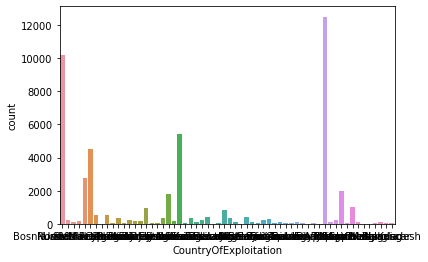

In [ ]:
sns.countplot(trafficking['CountryOfExploitation']);

In [ ]:
trafficking['yearOfRegistration'].describe


<bound method NDFrame.describe of 0        2002
1        2002
2        2002
3        2002
4        2002
         ... 
48796    2019
48797    2019
48798    2019
48799    2019
48800    2019
Name: yearOfRegistration, Length: 48801, dtype: int64>

In [ ]:
trafficking = trafficking[trafficking.yearOfRegistration != 2019]

In [ ]:
trafficking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48773 entries, 0 to 48772
Data columns (total 64 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use  0 non-null      float64
 1   yearOfRegistration                                                                               48773 non-null  int64  
 2   Datasource                                                                                       48773 non-null  object 
 3   gender                                                                                           48773 non-null  object 
 4   ageBroad                                                                                         48773 non-null  object 
 5   majo

In [ ]:
trafficking.head()

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


In [ ]:
trafficking.columns

Index(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use',
       'yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualE

In [ ]:

print(trafficking.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            48763, 48764, 48765, 48766, 48767, 48768, 48769, 48770, 48771,
            48772],
           dtype='int64', length=48773)


In [ ]:
trafficking['HumansTrafficked'] = trafficking ['yearOfRegistration']

In [ ]:
trafficking['HumansTrafficked'].dtypes

dtype('int64')

In [ ]:
trafficking['HumansTrafficked'] = trafficking['HumansTrafficked'].replace([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],1)

In [ ]:
trafficka = trafficking.replace({'-99':'undetermined'})

In [ ]:
traffickb = trafficka.replace([-99],'unknown')

In [ ]:
traffickb.describe(include='number')

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,HumansTrafficked
count,0.0,48773.000000,48773.0
mean,NaN,2014.141431,1.0
std,NaN,4.025040,0.0
min,NaN,2002.000000,1.0
25%,NaN,2013.000000,1.0
50%,NaN,2016.000000,1.0
75%,NaN,2017.000000,1.0
max,NaN,2018.000000,1.0


In [ ]:
traffickb.describe(exclude='number')

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773
unique,2,2,10,3,4,3,46,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1862,3,3,3,3,3,2,2,3,8,3,3,3,3,3,3,2,3,2,3,2,3,3,16,3,3,2,3,5,3,22,60,3,3,3,3,3
top,Case Management,Female,undetermined,Adult,undetermined,undetermined,Philippines,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,1,undetermined,unknown,unknown,0,unknown,unknown,unknown,unknown,unknown,undetermined,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,undetermined,unknown,unknown,unknown,unknown,unknown,unknown,undetermined,USA,0,0,0,0,1
freq,36261,35506,12348,26224,31319,42282,11365,46305,44804,48548,43637,42745,43952,45980,44961,45292,43181,46302,45484,48622,46793,46217,45527,45701,26592,32281,22699,24940,23846,25345,37775,37351,37351,47213,16174,28329,28368,28381,28001,26250,27120,28459,28256,28381,28459,28381,27117,27179,42524,30343,42357,42357,43558,24576,32430,22461,12512,38369,37898,38115,35514,39207


In [ ]:
traffickc = traffickb.drop(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use','Datasource',
                            'meansOfControlDebtBondage',	'meansOfControlTakesEarnings',	'meansOfControlRestrictsFinancialAccess',
                            'meansOfControlThreats',	'meansOfControlPsychologicalAbuse',	'meansOfControlPhysicalAbuse',
                            'meansOfControlSexualAbuse',	'meansOfControlFalsePromises',	'meansOfControlPsychoactiveSubstances',
                            'meansOfControlRestrictsMovement',	'meansOfControlRestrictsMedicalCare',	'meansOfControlExcessiveWorkingHours',
                            'meansOfControlUsesChildren', 'meansOfControlThreatOfLawEnforcement',	'meansOfControlWithholdsNecessities',	'meansOfControlWithholdsDocuments',	
                            'meansOfControlOther',	'meansOfControlNotSpecified', 'isForcedLabour',	'isSexualExploit',	'isOtherExploit',	'isSexAndLabour',	'isForcedMarriage',
                            'isForcedMilitary',	'isOrganRemoval',	'isSlaveryAndPractices', 'typeOfLabourAgriculture',	'typeOfLabourAquafarming',	'typeOfLabourBegging',
                            'typeOfLabourConstruction',	'typeOfLabourDomesticWork',	'typeOfLabourHospitality',	'typeOfLabourIllicitActivities',	'typeOfLabourManufacturing',
                            'typeOfLabourMiningOrDrilling',	'typeOfLabourPeddling', 'typeOfLabourTransportation',	'typeOfLabourOther',	'typeOfLabourNotSpecified',
                            'typeOfSexProstitution',	'typeOfSexPornography',	'typeOfSexRemoteInteractiveServices',	'typeOfSexPrivateSexualServices'], axis=1)

In [ ]:
traffickc['yearOfRegistration'].value_counts()

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
Name: yearOfRegistration, dtype: int64

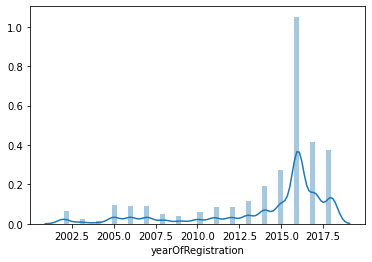

In [ ]:
import seaborn as sns
sns.distplot(traffickc['yearOfRegistration'])

In [ ]:
traffickc.head()

,yearOfRegistration,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlConcatenated,typeOfExploitConcatenated,typeOfLabourConcatenated,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,HumansTrafficked
0,2002,Female,18--20,Adult,undetermined,undetermined,Colombia,undetermined,Sexual exploitation,undetermined,unknown,unknown,unknown,undetermined,0,0,0,0,1,1
1,2002,Female,18--20,Adult,undetermined,undetermined,Colombia,undetermined,Sexual exploitation,undetermined,unknown,unknown,unknown,undetermined,0,0,0,0,1,1
2,2002,Female,18--20,Adult,undetermined,undetermined,Colombia,undetermined,Sexual exploitation,undetermined,unknown,unknown,unknown,undetermined,0,0,0,0,1,1
3,2002,Female,18--20,Adult,undetermined,undetermined,Colombia,undetermined,Sexual exploitation,undetermined,unknown,unknown,unknown,undetermined,0,0,0,0,1,1
4,2002,Female,18--20,Adult,undetermined,undetermined,Colombia,undetermined,Sexual exploitation,undetermined,unknown,unknown,unknown,undetermined,0,0,0,0,1,1


In [ ]:
traffickc['meansOfControlConcatenated'].value_counts()

undetermined                                                                                                                                 32281
Not specified                                                                                                                                 6100
Psychological abuse                                                                                                                            762
Restricts movement                                                                                                                             504
Psychoactive substances                                                                                                                        455
                                                                                                                                             ...  
Excessive working hours;Physical Abuse;Takes earnings;Withholds documents                                             

In [ ]:
traffickc['typeOfExploitConcatenated'].value_counts()

undetermined                                                                 16174
Sexual exploitation                                                          15961
Forced labour                                                                 8969
Other                                                                         7063
Slavery and similar practices                                                  359
Forced marriage                                                                168
Forced labour;Sexual exploitation;Combined sexual and labour exploitation       78
Forced labour;Other                                                              1
Name: typeOfExploitConcatenated, dtype: int64

In [ ]:
traffickc['typeOfLabourConcatenated'].value_counts()

undetermined                   42524
Domestic work                   2721
Construction                    1251
Not specified                   1097
Manufacturing                    453
Begging                          149
Agriculture                      149
Aquafarming                      107
Hospitality                       82
Other                             77
Peddling                          72
Other;Not specified               62
Domestic work;Other               22
Agriculture;Not specified          3
Construction;Not specified         3
Domestic work;Not specified        1
Name: typeOfLabourConcatenated, dtype: int64

In [ ]:
traffickc['typeOfSexConcatenated'].value_counts()

unknown                    24576
undetermined               19608
Prostitution                4386
Pornography                  160
Private sexual services       43
Name: typeOfSexConcatenated, dtype: int64

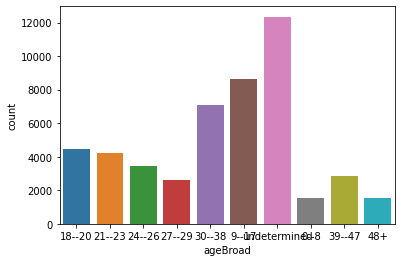

In [ ]:
sns.countplot(traffickc['ageBroad']);

In [ ]:
X, y = traffickc, traffickc['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [ ]:
dummy.score(X_test, y_test)

0.5018861735279646

In [ ]:
train, val, test = np.split(traffickc.sample(frac=1), [int(.6*len(traffickc)), int(.8*len(traffickc))])

In [ ]:
train.shape, val.shape, test.shape

((29263, 20), (9755, 20), (9755, 20))

In [ ]:
train.describe()

,yearOfRegistration,HumansTrafficked
count,29263.000000,29263.0
mean,2014.153060,1.0
std,4.023729,0.0
min,2002.000000,1.0
25%,2013.000000,1.0
50%,2016.000000,1.0
75%,2017.000000,1.0
max,2018.000000,1.0


In [ ]:
train.describe(include='number')

,yearOfRegistration,HumansTrafficked
count,29263.000000,29263.0
mean,2014.153060,1.0
std,4.023729,0.0
min,2002.000000,1.0
25%,2013.000000,1.0
50%,2016.000000,1.0
75%,2017.000000,1.0
max,2018.000000,1.0


In [ ]:
train.describe(exclude='number')

,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlConcatenated,typeOfExploitConcatenated,typeOfLabourConcatenated,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263,29263
unique,2,10,3,4,3,46,1344,7,15,5,3,21,60,3,3,3,3,3
top,Female,undetermined,Adult,undetermined,undetermined,Philippines,undetermined,undetermined,undetermined,unknown,unknown,undetermined,USA,0,0,0,0,1
freq,21241,7502,15668,18765,25378,6925,19426,9603,25482,14738,19475,13543,7474,23062,22778,22900,21347,23551


In [ ]:
print("Total Training Features with NaN Values = " + str(train.columns[train.isnull().sum() != 0].size))
if (train.columns[train.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train.columns[train.isnull().sum() != 0])))
    train[train.columns[train.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Training Features with NaN Values = 0


In [ ]:
print("Total Test Features with NaN Values = " + str(test.columns[test.isnull().sum() != 0].size))
if (test.columns[test.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test.columns[test.isnull().sum() != 0])))
    test[test.columns[test.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


In [ ]:
print("Total Validation Features with NaN Values = " + str(val.columns[val.isnull().sum() != 0].size))
if (val.columns[val.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(val.columns[val.isnull().sum() != 0])))
    val[val.columns[val.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)


Total Validation Features with NaN Values = 0


In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum(), val.isnull().sum().sum()

(0, 0, 0)

In [ ]:
 train.loc[:, (train == 0).any(axis=0)]

,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
4379,0,0,0,0,0,1
31565,unknown,0,0,0,1,0
23473,unknown,0,0,0,0,1
36542,unknown,0,0,0,1,0
31612,unknown,0,0,0,0,1
...,...,...,...,...,...,...
27413,unknown,0,0,1,0,0
14557,0,0,0,0,0,1
22093,unknown,0,0,0,0,1
6525,0,0,0,0,0,1


In [ ]:
target = 'gender'
train_features = train.drop(columns=[target])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 100].index.tolist()

features = numeric_features + categorical_features

In [ ]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [ ]:
target = 'gender'
y_train = train[target]
y_train.value_counts(normalize=True)

Female    0.725865
Male      0.274135
Name: gender, dtype: float64

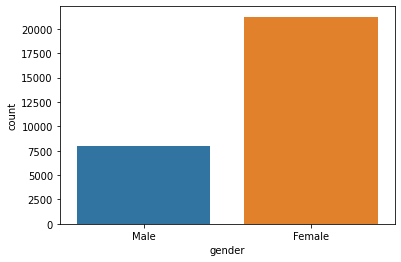

In [ ]:
sns.countplot(y_train);

In [ ]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
#y_pred

## Baseline Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.7258654273314424

In [ ]:
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.724551512045105

## Logistic Regression


In [ ]:
model = LogisticRegression()

In [ ]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train_encoded.head()

,yearOfRegistration,HumansTrafficked,ageBroad_39--47,ageBroad_undetermined,ageBroad_18--20,ageBroad_9--17,ageBroad_21--23,ageBroad_48+,ageBroad_30--38,ageBroad_27--29,ageBroad_24--26,ageBroad_0--8,majorityStatus_Adult,majorityStatus_undetermined,majorityStatus_Minor,majorityStatusAtExploit_undetermined,majorityStatusAtExploit_unknown,majorityStatusAtExploit_Adult,majorityStatusAtExploit_Minor,majorityEntry_undetermined,majorityEntry_Adult,majorityEntry_Minor,citizenship_Belarus,citizenship_Philippines,citizenship_Cambodia,citizenship_Ukraine,citizenship_Moldova,citizenship_undetermined,citizenship_Indonesia,citizenship_00,citizenship_USA,citizenship_Myanmar,citizenship_Ghana,citizenship_Uzbekistan,citizenship_Viet Nam,citizenship_Guinea,citizenship_Bulgaria,citizenship_Guinea-Bissau,citizenship_Thailand,citizenship_Romania,...,CountryOfExploitation_Hong Kong,CountryOfExploitation_North Macedonia,CountryOfExploitation_Romania,CountryOfExploitation_Egypt,CountryOfExploitation_Syria,CountryOfExploitation_Serbia,CountryOfExploitation_Czechia,CountryOfExploitation_Japan,CountryOfExploitation_South Africa,CountryOfExploitation_Jordan,CountryOfExploitation_Singapore,CountryOfExploitation_Madagascar,CountryOfExploitation_Argentina,CountryOfExploitation_Bangladesh,CountryOfExploitation_Taiwan,CountryOfExploitation_Denmark,CountryOfExploitation_Albania,CountryOfExploitation_Uganda,CountryOfExploitation_Sierra Leone,CountryOfExploitation_Ecuador,CountryOfExploitation_Cyprus,CountryOfExploitation_Tajikistan,CountryOfExploitation_Austria,CountryOfExploitation_Mauritius,CountryOfExploitation_Libya,recruiterRelationIntimatePartner_0,recruiterRelationIntimatePartner_unknown,recruiterRelationIntimatePartner_1,recruiterRelationFriend_0,recruiterRelationFriend_unknown,recruiterRelationFriend_1,recruiterRelationFamily_0,recruiterRelationFamily_unknown,recruiterRelationFamily_1,recruiterRelationOther_0,recruiterRelationOther_1,recruiterRelationOther_unknown,recruiterRelationUnknown_1,recruiterRelationUnknown_0,recruiterRelationUnknown_unknown
4379,2006,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
31565,2016,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
23473,2016,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
36542,2017,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
31612,2016,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

accuracy_score(y_val, y_pred)

0.8490005125576627

In [ ]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients

yearOfRegistration                  0.376200
HumansTrafficked                    0.000000
ageBroad_39--47                     0.126927
ageBroad_undetermined               0.041026
ageBroad_18--20                    -0.216879
                                      ...   
recruiterRelationOther_1           -0.060337
recruiterRelationOther_unknown     -0.018658
recruiterRelationUnknown_1          0.026334
recruiterRelationUnknown_0         -0.015632
recruiterRelationUnknown_unknown   -0.140074
Length: 194, dtype: float64

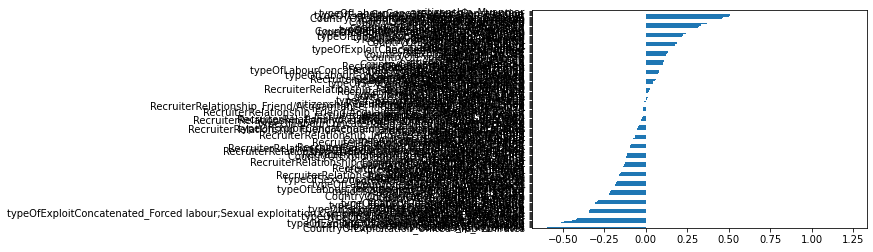

In [ ]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [ ]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)


pipeline.fit(X_train, y_train)


print ('Validation Accruacy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

Validation Accruacy 0.8490005125576627


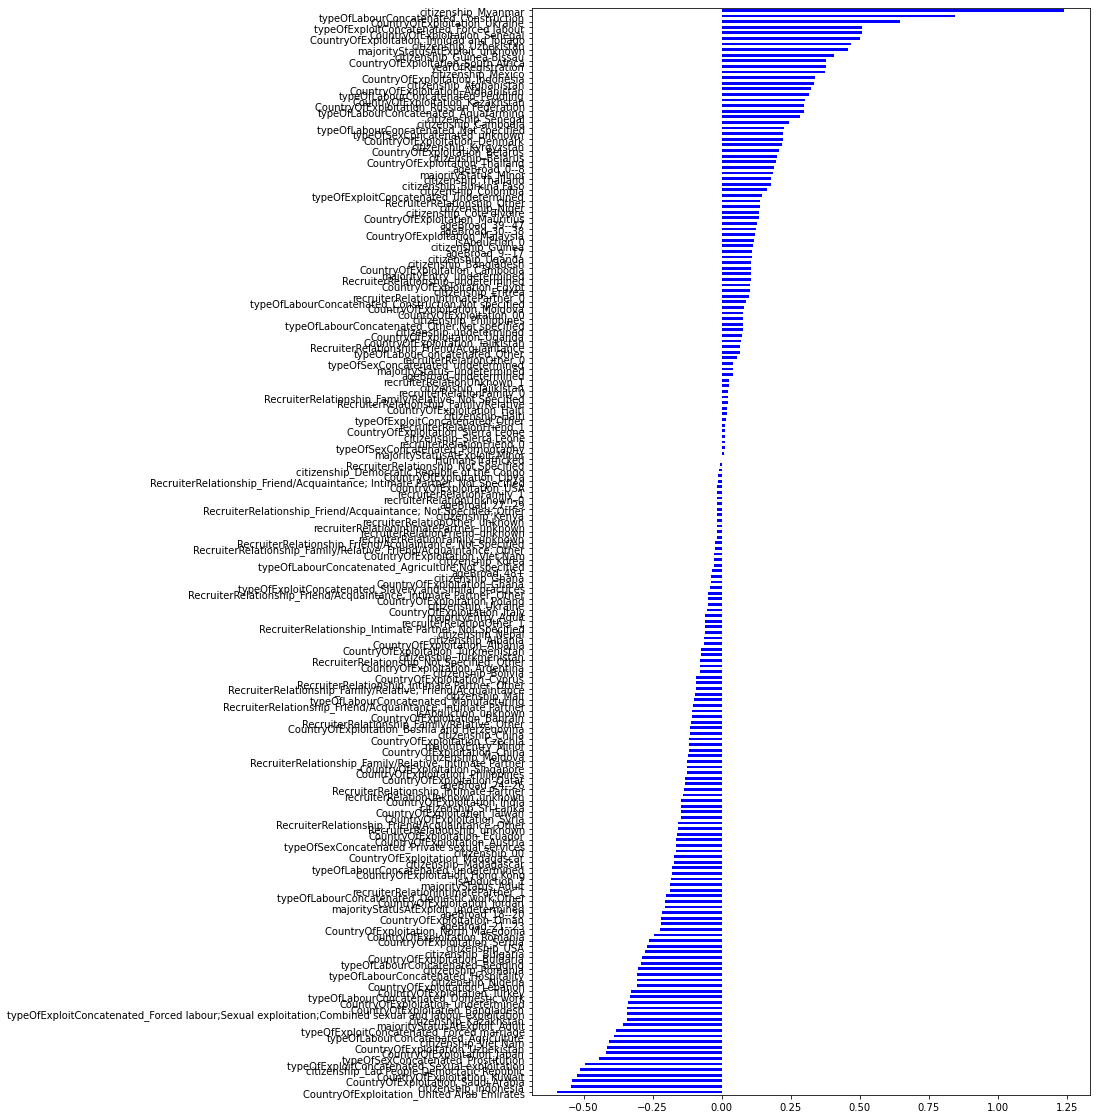

In [ ]:
model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,20))
coefficients.sort_values().plot.barh(color='blue');

## Decision Tree


In [ ]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent'), 
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)

print ('Train Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

Train Accuracy 0.8845982981922564
Validation Accuracy 0.8800615069195284


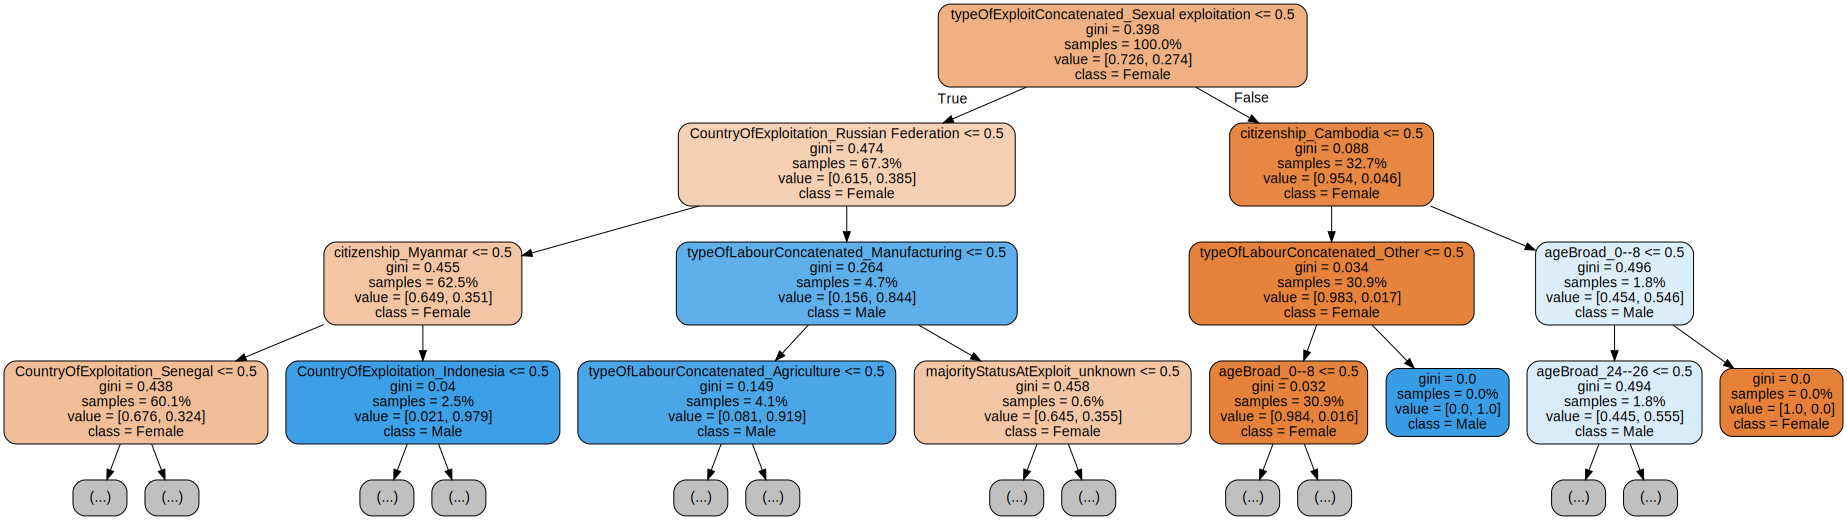

In [ ]:
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=True, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

## Random Classifier

In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.879446437724244


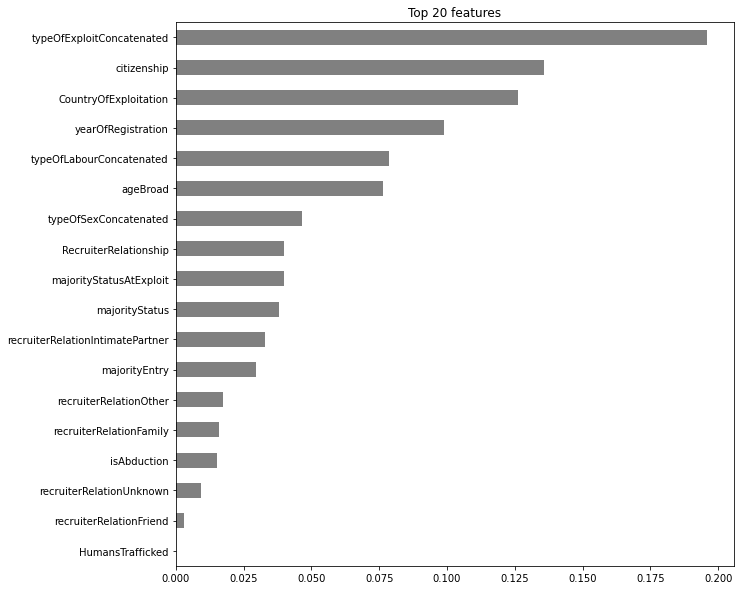

In [ ]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
target = 'gender'
features = traffickc.columns.drop(target)

X = traffickc[features]
y = traffickc[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
feature = 'ageBroad'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)

In [ ]:
feature =  'ageBroad'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


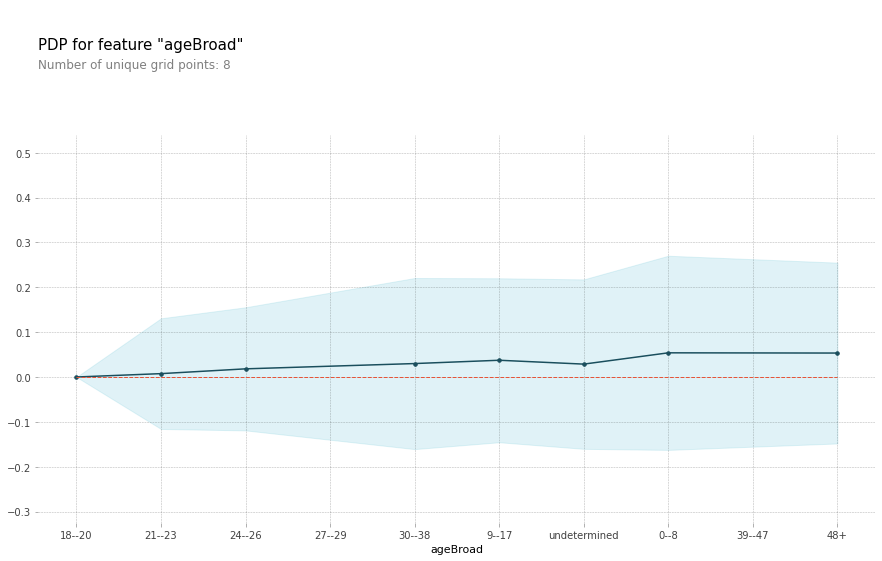

In [ ]:
pdp.pdp_plot(pdp_dist, feature)

plt.xticks(category_codes, category_names);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


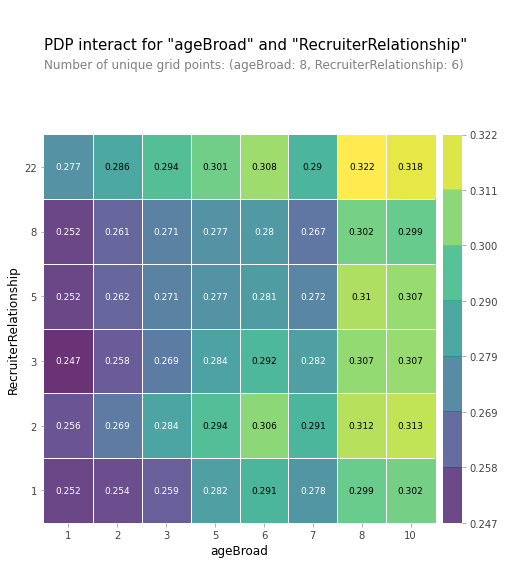

In [ ]:
features = ['ageBroad', 'RecruiterRelationship']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

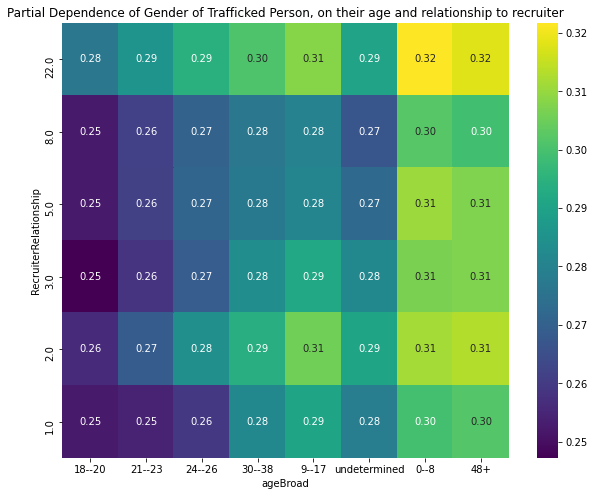

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Gender of Trafficked Person, on their age and relationship to recruiter');

In [ ]:
traffickc['RecruiterRelationship'].value_counts()

undetermined                                            22461
Not Specified                                            8730
unknown                                                  8192
Other                                                    3859
Friend/Acquaintance                                      1992
Family/Relative                                          1793
Intimate Partner                                         1505
Friend/Acquaintance; Other                                 51
Family/Relative; Intimate Partner                          41
Intimate Partner; Other                                    39
Friend/Acquaintance; Intimate Partner                      28
Not Specified; Other                                       24
Family/Relative; Other                                     18
Family/Relative; Friend/Acquaintance                       16
Family/Relative; Not Specified                              8
Intimate Partner; Not Specified                             6
Friend/A

In [ ]:
traffickd = traffickc.groupby(['yearOfRegistration', 'gender']).sum().reset_index()
traffickd


,yearOfRegistration,gender,HumansTrafficked
0,2002,Female,1026
1,2003,Female,342
2,2003,Male,15
3,2004,Female,223
4,2005,Female,1030
5,2005,Male,425
6,2006,Female,1134
7,2006,Male,289
8,2007,Female,1072
9,2007,Male,345


In [ ]:
fig = px.scatter(
    traffickd, x='yearOfRegistration', y='HumansTrafficked', opacity=0.65,
    trendline='ols', trendline_color_override='blue'
)
fig.show()

In [ ]:
fig5 = px.scatter(traffickd, x="yearOfRegistration", y="HumansTrafficked", color="gender", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig5.show()

In [ ]:
!pip install chart_studio
import chart_studio

In [ ]:
username = 'Sid-Oya' # your username
api_key = 'vpIM8elq3MbbSwTWeB6n' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username='Sid-Oya', api_key='vpIM8elq3MbbSwTWeB6n')

In [ ]:
import chart_studio.plotly as py
py.plot(fig5, filename = 'HumansTrafficked', auto_open=True)


'https://plotly.com/~Sid-Oya/27/'

In [ ]:
trafficke = traffickc.groupby(['ageBroad','yearOfRegistration']).sum().reset_index()
trafficke.sort_values(['ageBroad','yearOfRegistration'], ascending=True)
trafficke


,ageBroad,yearOfRegistration,HumansTrafficked
0,0--8,2005,125
1,0--8,2007,92
2,0--8,2008,24
3,0--8,2009,74
4,0--8,2010,178
...,...,...,...
137,undetermined,2002,31
138,undetermined,2003,37
139,undetermined,2016,11285
140,undetermined,2017,539


In [ ]:
fig1 = px.bar(trafficke, x='yearOfRegistration', y='ageBroad',
             hover_data=['HumansTrafficked'], color='ageBroad',
             labels={'Trafficked':'Trafficked'})
fig1.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig1, filename = 'HumansTrafficked', auto_open=True)


'https://plotly.com/~Sid-Oya/27/'

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig2 = go.Figure(data=go.Scatter(x=trafficke['ageBroad'],
                                y=trafficke['HumansTrafficked'],
                                mode='markers',
                                marker_color=trafficke['yearOfRegistration'],
                                text=trafficke['citizenship'])) # hover text goes here

fig2.update_layout(title='Age and Citizenship of Those Trafficked')
fig2.show()

KeyError: ignored

In [ ]:
traffickf = traffickc.groupby(['ageBroad']).sum().reset_index()
traffickf.sort_values(['ageBroad'], ascending=True)
traffickf


In [ ]:
import plotly.express as px
fig3 = px.scatter(traffickf, x='ageBroad', y='HumansTrafficked')
fig3.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig3, filename = 'AgeTrafficked', auto_open=True)

In [ ]:
import chart_studio.plotly as py
py.plot(fig1, filename = 'GenderTrafficked', auto_open=True)

In [ ]:
import shap

In [ ]:
train_id = X_train['yearOfRegistration']
val_id = X_val['yearOfRegistration']
test_id = X_test['yearOfRegistration']

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['auc']
val_error = results['validation_1']['auc']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
plt.ylim((0.9, 1.0)) # Zoom in
plt.legend();

In [ ]:
row = X_test.iloc[[2500]] # Dataframe with a single row (double brackets keeps it a dataframe)
row

In [ ]:
y_test.iloc[[4800]]

In [ ]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)